In [1]:
install.packages("googledrive")
library(googledrive)

# Authenticate and mount Google Drive
drive_auth(use_oob = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=4d5e9a377713a5e359d448840c6c2522&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIQnhCa1lCTHpfNDMwNVFiLUFacmlBOGxqNXhPbERJYzQtMDlPeW5uQTYyd1RZNGhfaURwZW9UNDl0dGpCUy1JQSIsInN0YXRlIjoiNGQ1ZTlhMzc3NzEzYTVlMzU5ZDQ0ODg0MGM2YzI1MjIifQ==


In [2]:

required_packages <- c("forecast", "tseries", "ggplot2")

# Install missing packages
new_packages <- required_packages[!(required_packages %in% installed.packages()[,"Package"])]
if(length(new_packages)) install.packages(new_packages)

library(forecast)
library(tseries)
# ggplot2 should already be loaded as a dependency of forecast; it's explicitly loaded here for clarity
if (!"ggplot2" %in% loadedNamespaces()) library(ggplot2)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘quadprog’, ‘quantmod’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [4]:
install.packages("Metrics")
install.packages("tibble")
library(Metrics)
library(forecast)
library(knitr)
library(tibble)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
data <- read.table("/content/sample_data/JJ.dat", header = TRUE )
print(data)

          JJ
1   0.710000
2   0.630000
3   0.850000
4   0.440000
5   0.610000
6   0.690000
7   0.920000
8   0.550000
9   0.720000
10  0.770000
11  0.920000
12  0.600000
13  0.830000
14  0.800000
15  1.000000
16  0.770000
17  0.920000
18  1.000000
19  1.240000
20  1.000000
21  1.160000
22  1.300000
23  1.450000
24  1.250000
25  1.260000
26  1.380000
27  1.860000
28  1.560000
29  1.530000
30  1.590000
31  1.830000
32  1.860000
33  1.530000
34  2.070000
35  2.340000
36  2.250000
37  2.160000
38  2.430000
39  2.700000
40  2.250000
41  2.790000
42  3.420000
43  3.690000
44  3.600000
45  3.600000
46  4.320000
47  4.320000
48  4.050000
49  4.860000
50  5.040000
51  5.040000
52  4.410000
53  5.580000
54  5.850000
55  6.570000
56  5.310000
57  6.030000
58  6.390000
59  6.930000
60  5.850000
61  6.930000
62  7.740000
63  7.830000
64  6.120000
65  7.740000
66  8.910000
67  8.280000
68  6.840000
69  9.540000
70 10.260000
71  9.540000
72  8.729999
73 11.880000
74 12.060000
75 12.150000
76  8.910000

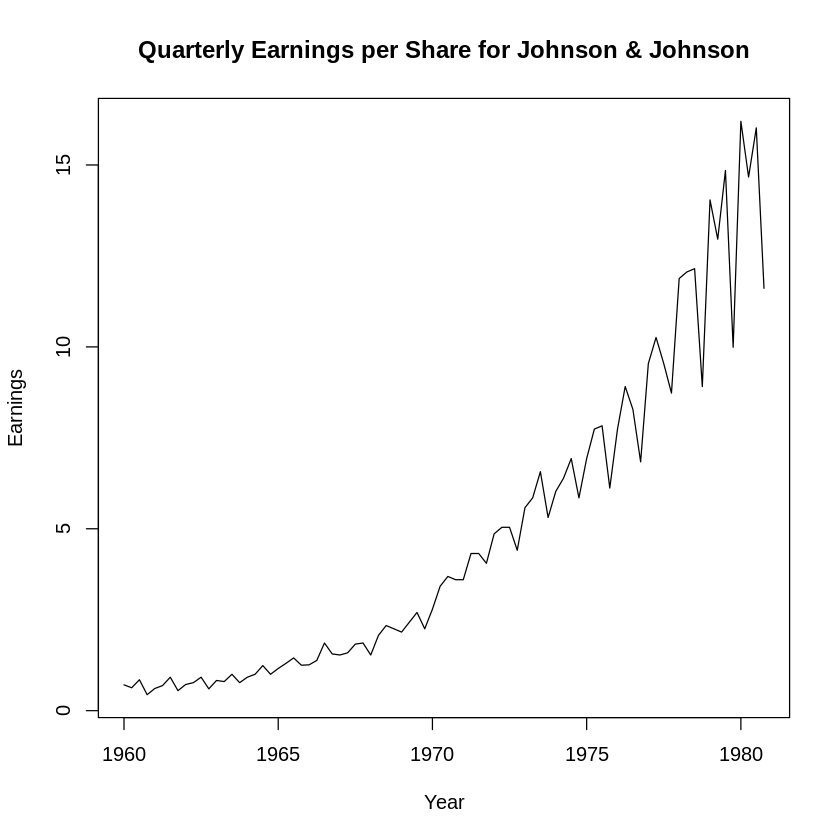

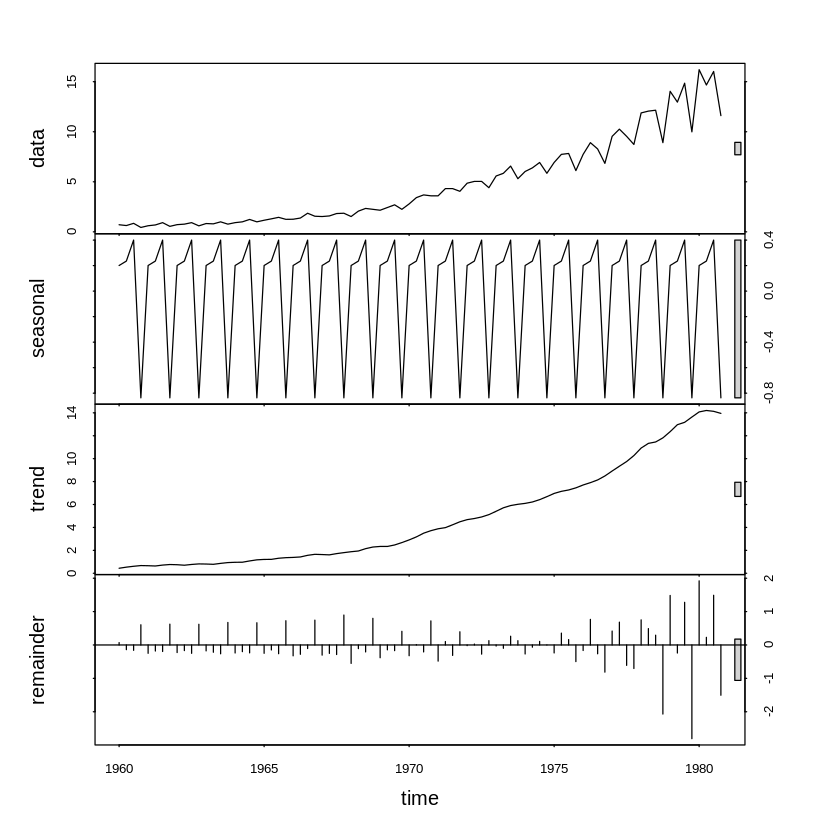

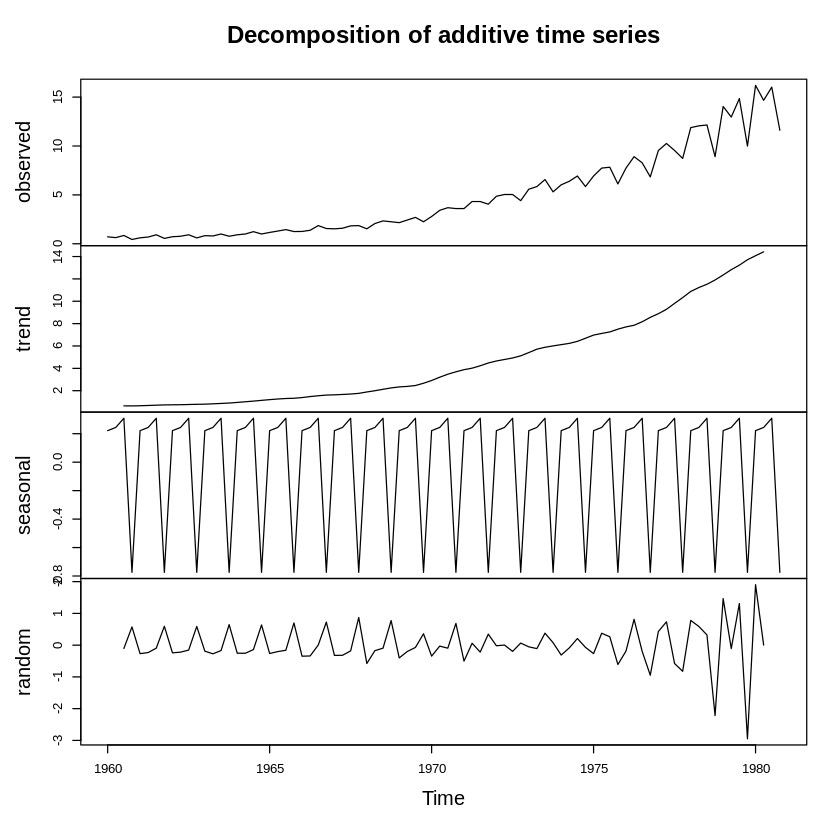

In [7]:
ts_data <- ts(data$JJ, start=c(1960,1), frequency=4)
plot(ts_data, xlab="Year", ylab="Earnings", main="Quarterly Earnings per Share for Johnson & Johnson")
decomposed <- stl(ts_data, s.window="periodic")
plot(decomposed)
plot(decompose(ts_data))

# The graph shows that the  trend is going up and that variance is not constant as it goes. There is also quartelry seasonality  

Since the ADF shows that the data is non stationary, checking the ACF and PACF to verify the non-stationarity

In [8]:
summary(ts_data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.440   1.248   3.510   4.800   7.133  16.200 

[Shinu] Since the variance of the data is not constant, applying log transformation to make it constant

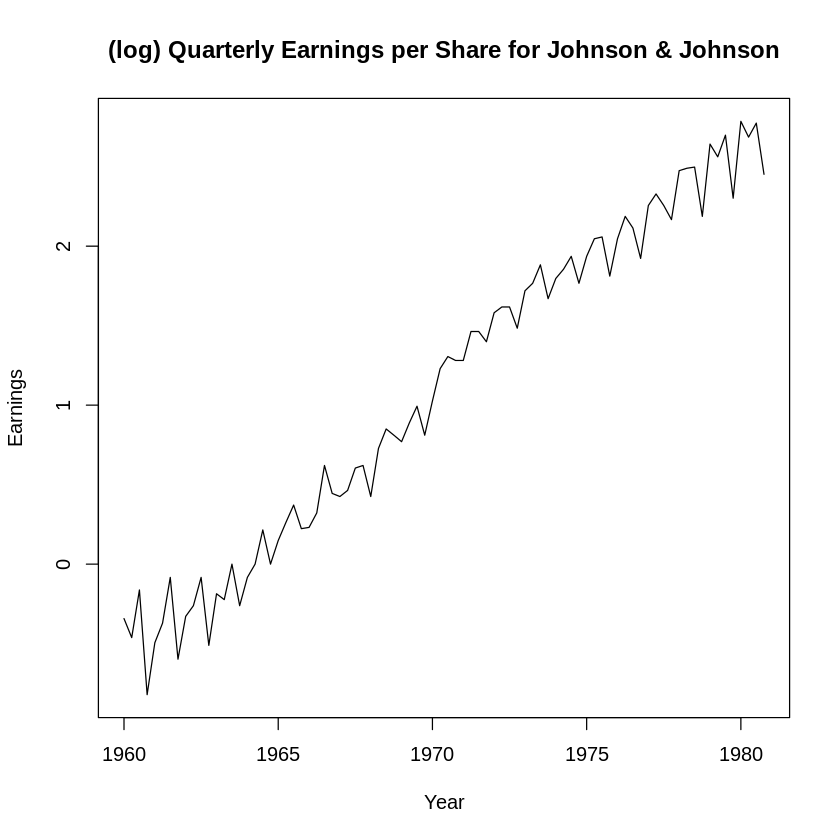

In [9]:
log_ts_data = log(ts_data)
plot(log_ts_data, xlab="Year", ylab="Earnings", main="(log) Quarterly Earnings per Share for Johnson & Johnson")

[shinu] P value is greater than 0.05 indicating that the data is Series is likely non-stationary


	Augmented Dickey-Fuller Test

data:  log_ts_data
Dickey-Fuller = -1.1543, Lag order = 4, p-value = 0.9087
alternative hypothesis: stationary


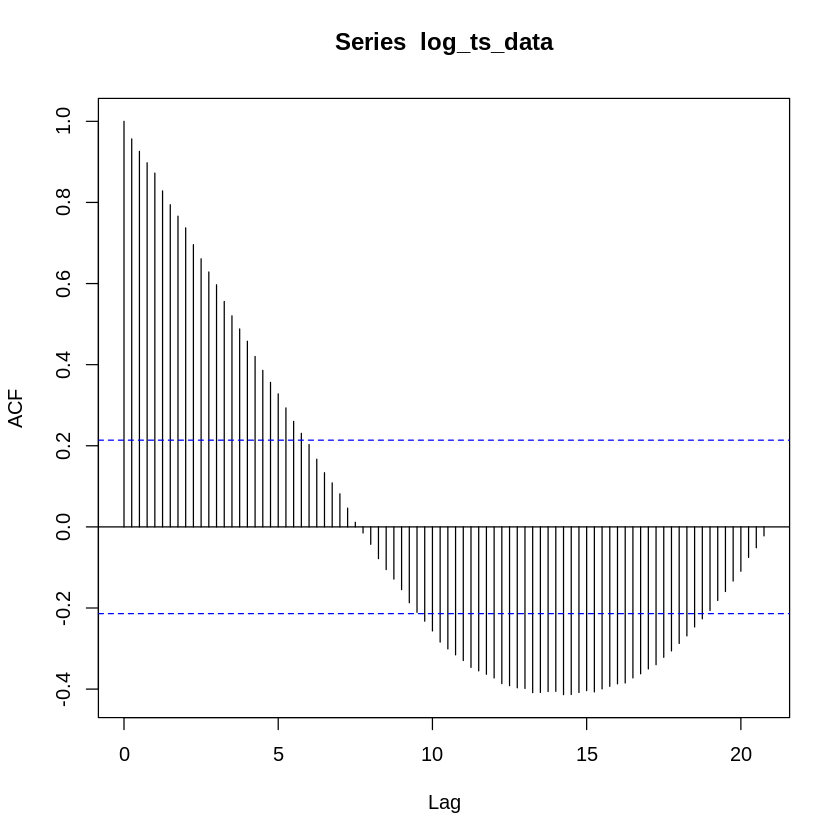

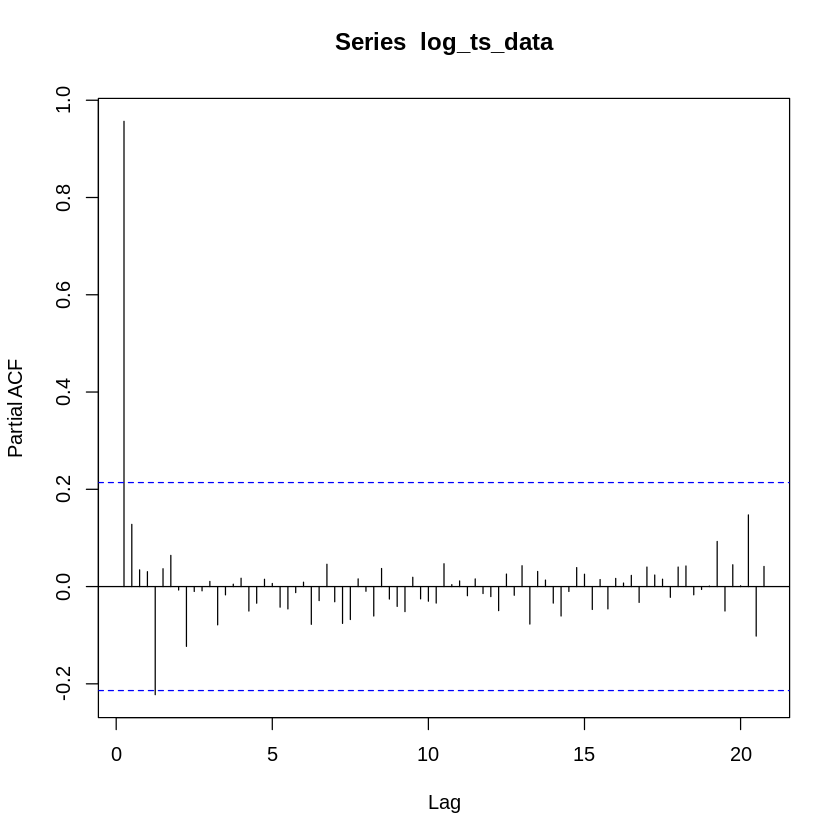

In [10]:
# check stationary w/ adf
adf.test(log_ts_data, alternative = "stationary")
acf(log_ts_data ,lag.max = 100)
pacf(log_ts_data ,lag.max = 100)

 It can be seen that the ooriginal plot shows higher variation at the higher values of the data series, whereas the plot of the logarithmic values shows much more equal variation at all levels of the series. There is still upward trend to be removed.Hence differencing the data.

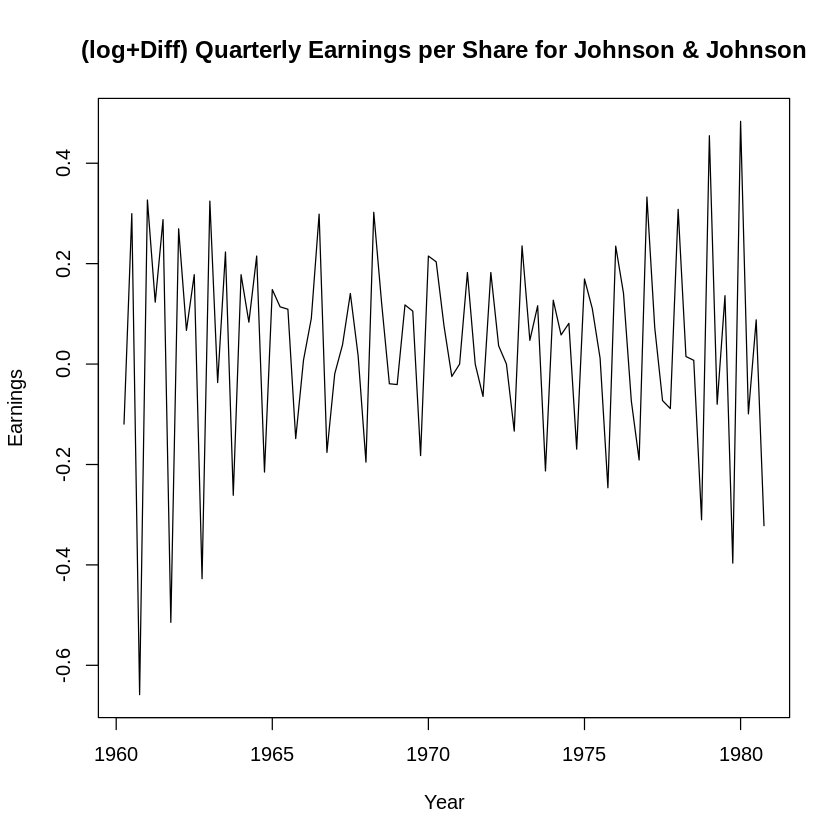

In [11]:
diff_log_ts_data = diff(log_ts_data,frequency =1)
plot(diff_log_ts_data, xlab="Year", ylab="Earnings", main="(log+Diff) Quarterly Earnings per Share for Johnson & Johnson")

Based on the above graph , trend ans seasonality has been removed.Howvere, still not stationary as variance is still very different throughout the year

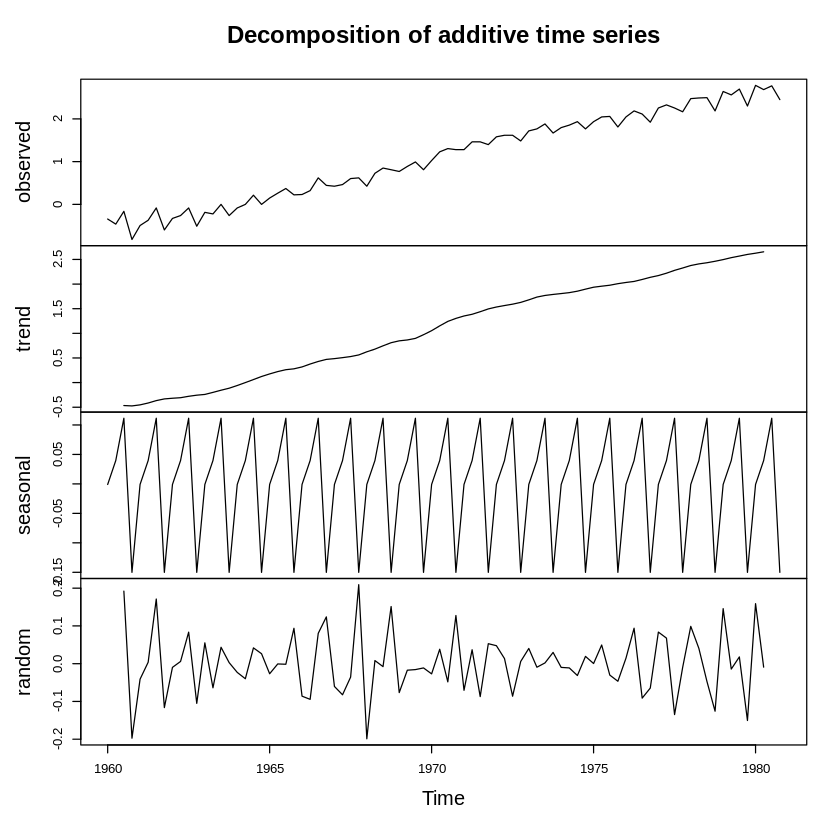

In [12]:
plot(decompose(log_ts_data))
trend <- decompose(log_ts_data)$trend
seasons <- decompose(log_ts_data)$seasonal
random <- decompose(log_ts_data)$random
random <- na.omit(random)

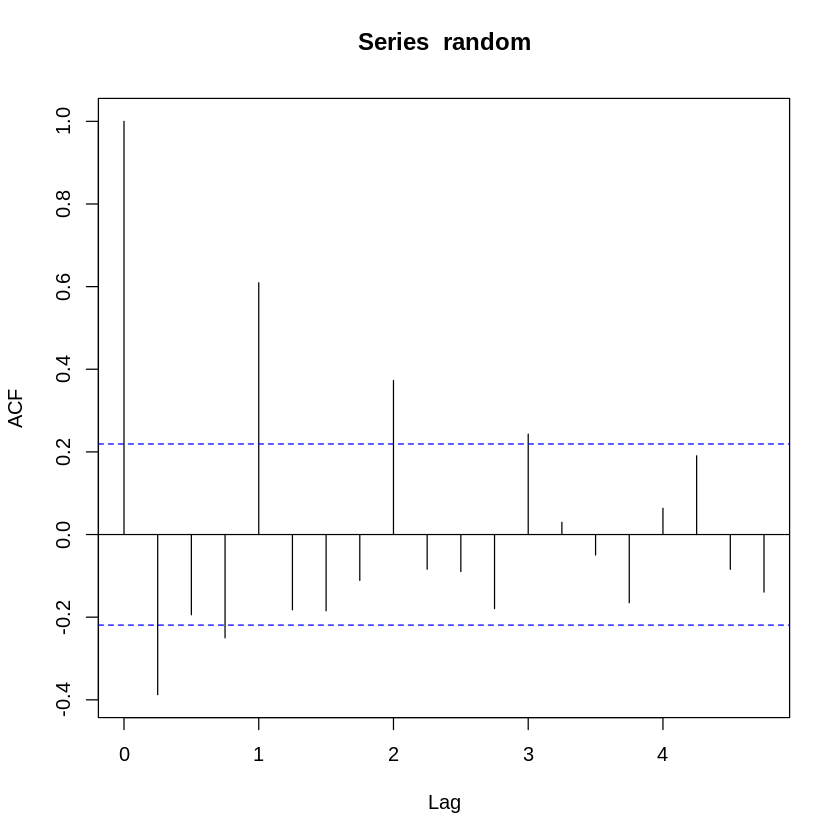

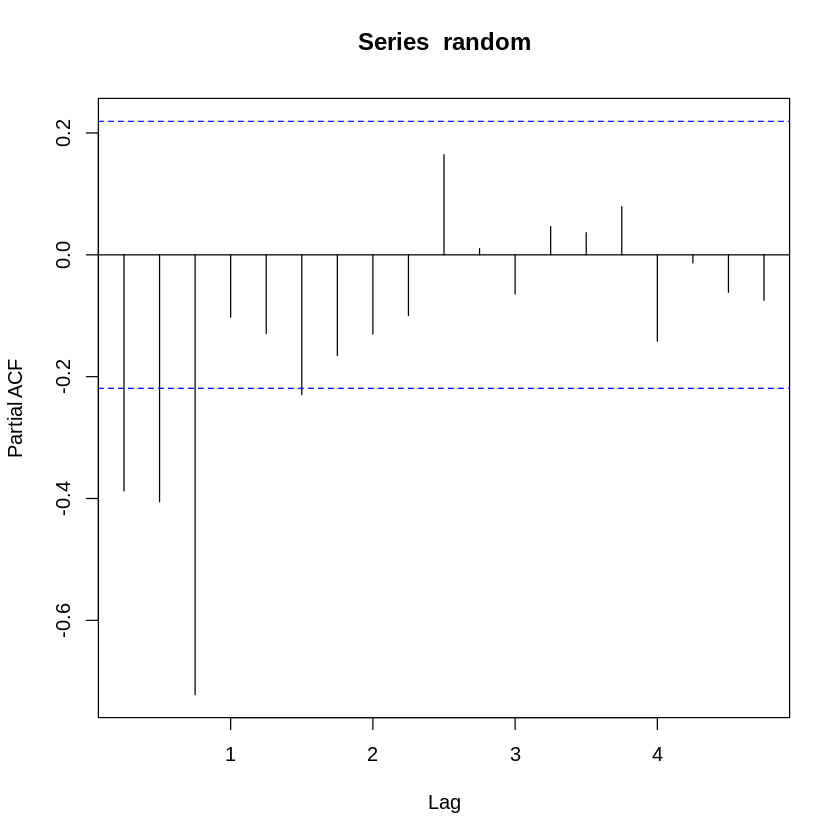

In [13]:
acf(random)
pacf(random)

[Shinu] Above graph shows auto correlation at 4,8,12 etc, indicating seasonanility. In order to remove seasonality, the data can be differenced

[shinu]#ARIMA parameters are can be identified as  D= 1, Q = 4 based on ACF as the significant lag is  the 4th one and after the lag 4 the values goes down. P= 4 based on PACF , as the significant lag is  the 4th one and after the lag 4 the values goes down
#[Shinu]Considering the large negative correlarion, lets also consoder P = 3, so additional ARIMA (4,1,3)

In [14]:
# first order differencing
ts_data_diff <- diff(log_ts_data, differences = 1)
adf.test(ts_data_diff)

Warning message in adf.test(ts_data_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ts_data_diff
Dickey-Fuller = -4.5649, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


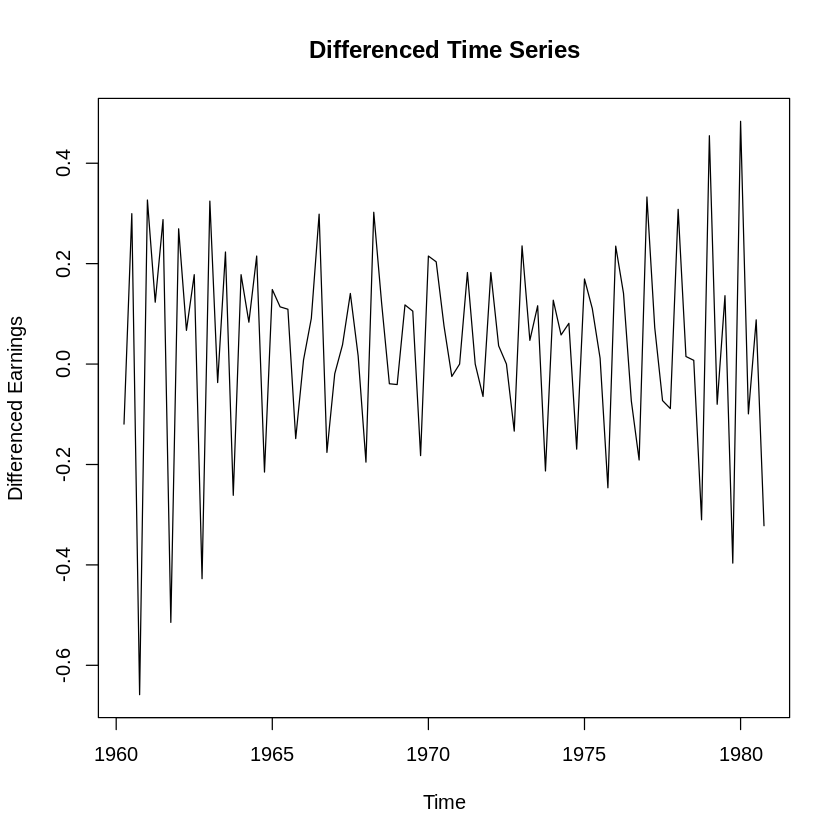

In [15]:
plot(ts_data_diff, main="Differenced Time Series", xlab="Time", ylab="Differenced Earnings")

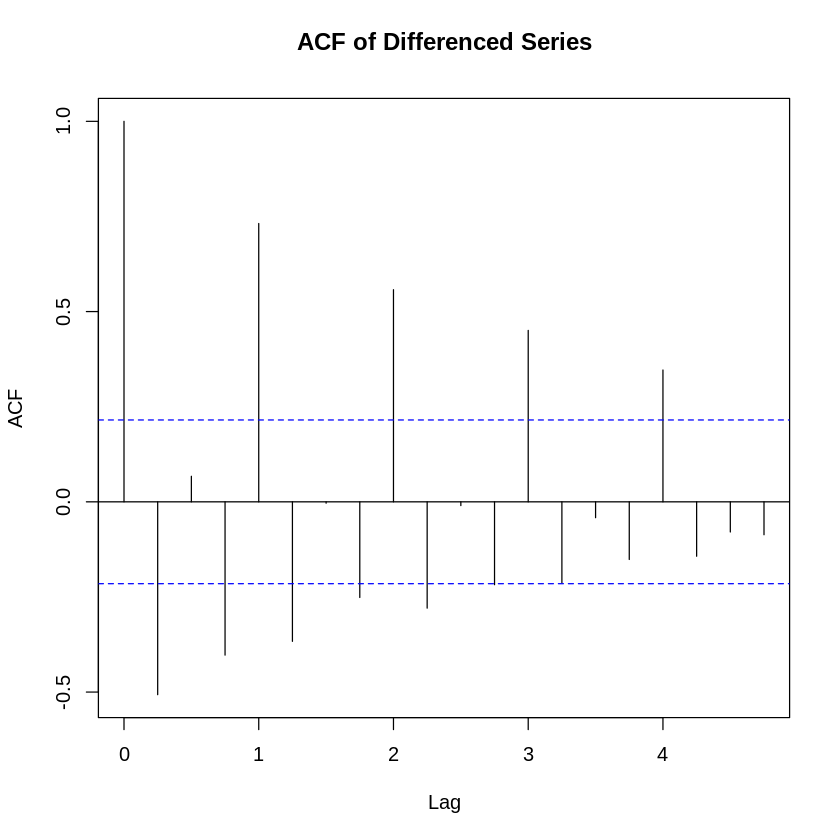

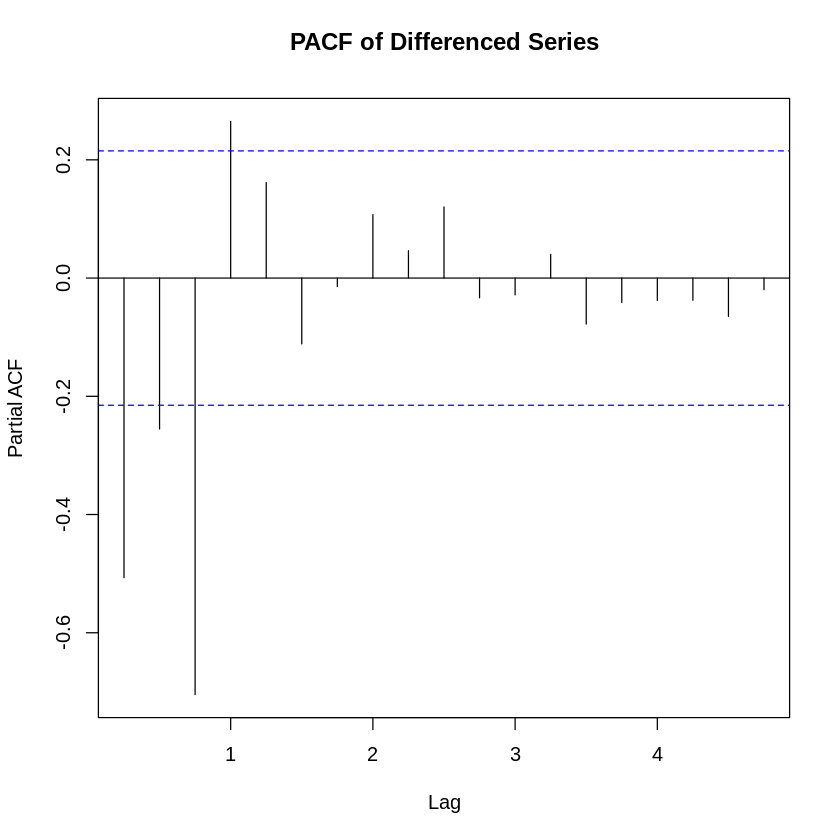

In [16]:
acf(ts_data_diff, main="ACF of Differenced Series")
pacf(ts_data_diff, main="PACF of Differenced Series")

Warning message in adf.test(ts_data_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ts_data_diff
Dickey-Fuller = -4.5649, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


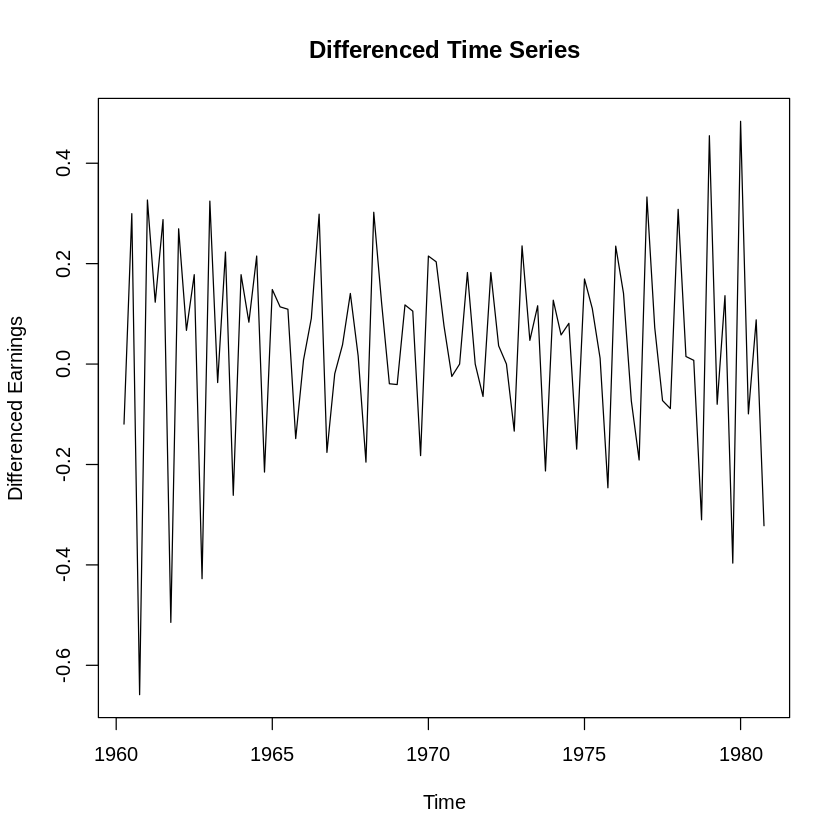

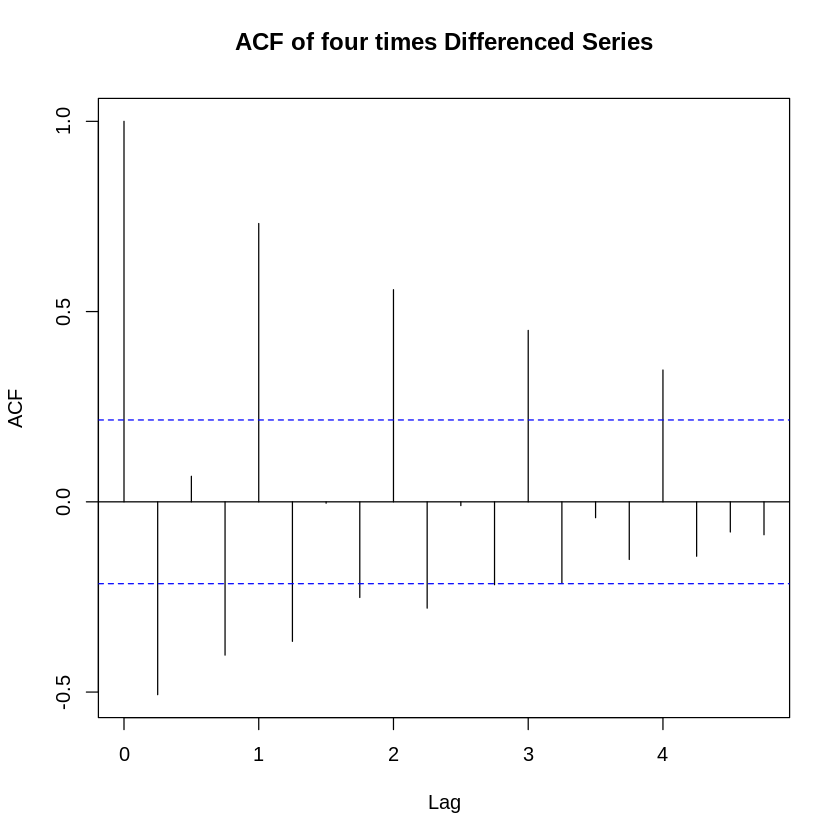

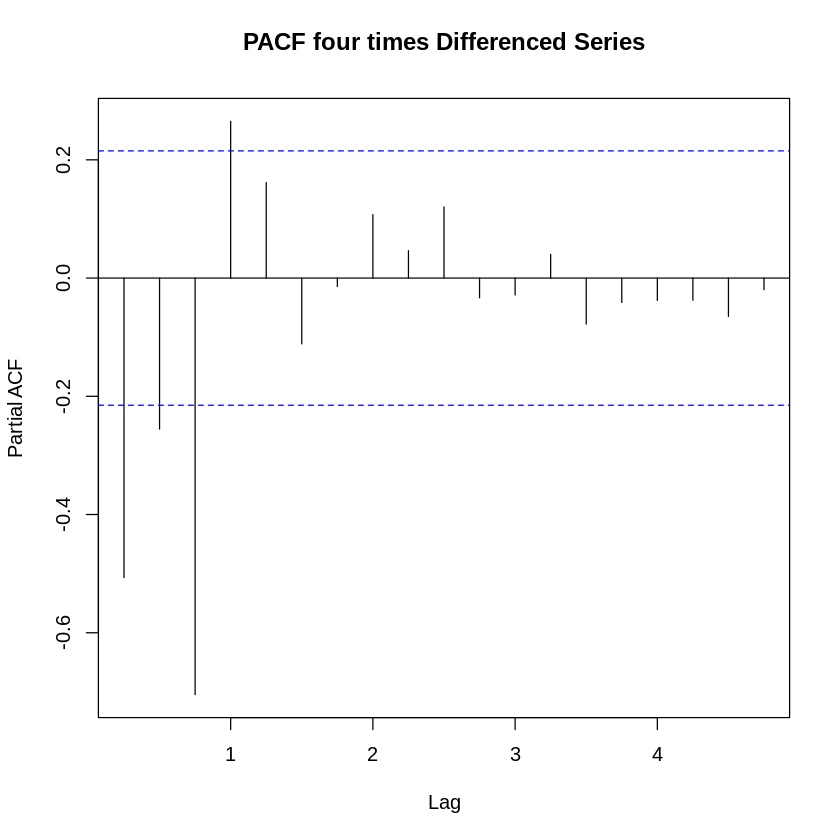

In [17]:
# Seasonal differencing differencing
ts_data_diff_seasonal <- diff(log_ts_data, differences = 4)
plot(ts_data_diff, main="Differenced Time Series", xlab="Time", ylab="Differenced Earnings")
adf.test(ts_data_diff)
acf(ts_data_diff, main="ACF of four times Differenced Series")
pacf(ts_data_diff, main="PACF four times Differenced Series")
#SARIMA  seasonal parameters are can be identified as  D= 1, Q = 4 based on ACF as the significant lag is  the 4th one and after the lag 4 the values goes down. P= 4 based on PACF , as the significant lag is  the 4th one and after the lag 4 the values goes down
#SThe final SARIMA order can be given as ARIMA(4,1,4)(4,1,4)[4] and ARIMA(4,1,3)(4,1,4)[4]
#


Series: log_ts_data 
ARIMA(4,1,3)(4,1,3)[4] 

Coefficients:
         ar1     ar2      ar3      ar4      ma1      ma2     ma3    sar1
      0.0900  0.2559  -0.3631  -0.4866  -0.7984  -0.0762  0.2392  0.2730
s.e.  0.3143  0.2459   0.2101   0.2525   0.3440   0.4007  0.3249  0.3294
         sar2     sar3     sar4     sma1     sma2    sma3
      -0.1052  -0.6719  -0.2063  -0.1688  -0.1675  0.9973
s.e.   0.2125   0.1352   0.2629   0.2260   0.2179  0.1733

sigma^2 = 0.006412:  log likelihood = 86.76
AIC=-143.53   AICc=-135.91   BIC=-107.99

Training set error measures:
                      ME       RMSE        MAE MPE MAPE      MASE      ACF1
Training set 0.007328502 0.07044086 0.05733717 NaN  Inf 0.3577793 0.0245579


	Ljung-Box test

data:  Residuals from ARIMA(4,1,3)(4,1,3)[4]
Q* = 5.9848, df = 3, p-value = 0.1124

Model df: 14.   Total lags used: 17



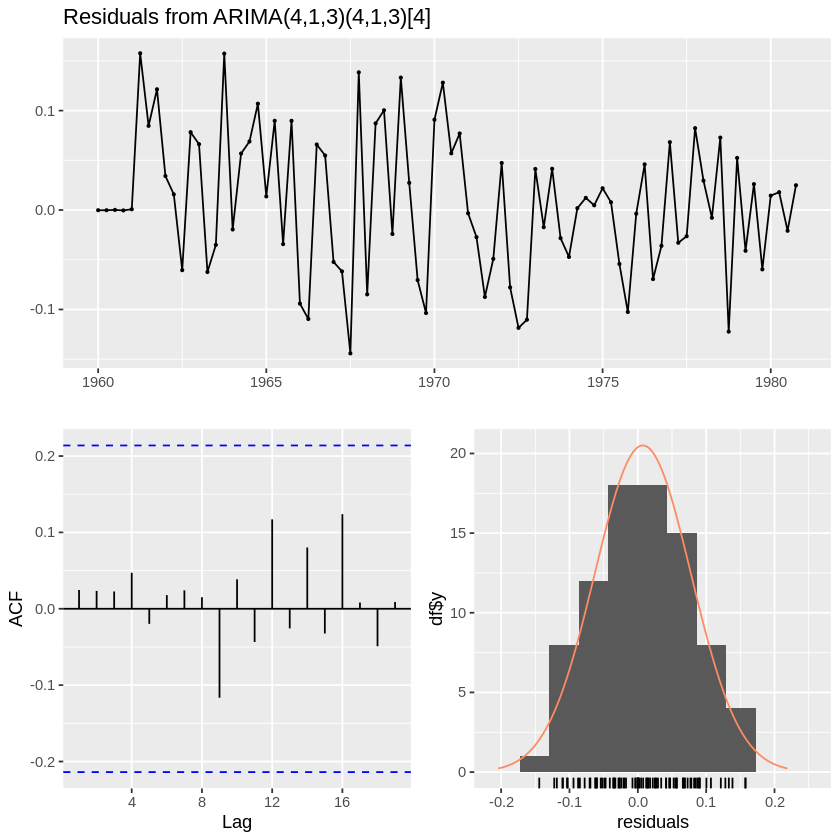

Series: log_ts_data 
ARIMA(4,1,4)(4,1,4)[4] 

Coefficients:
          ar1      ar2      ar3      ar4      ma1     ma2      ma3      ma4
      -0.1141  -0.0382  -0.2324  -0.5231  -0.5004  0.0247  -0.0055  -0.5141
s.e.   0.1733   0.1518   0.1436   0.1955   0.1879  0.1708   0.1560   0.2264
         sar1     sar2    sar3    sar4    sma1    sma2    sma3     sma4
      -1.1091  -0.7362  0.1581  0.4469  1.8533  1.7736  0.8376  -0.0816
s.e.   0.3073   0.4419  0.4114  0.2394  0.3392  0.6713  0.5890   0.3012

sigma^2 = 0.007038:  log likelihood = 85.66
AIC=-137.32   AICc=-127.29   BIC=-97.04

Training set error measures:
                     ME       RMSE        MAE MPE MAPE      MASE        ACF1
Training set 0.01296632 0.07265574 0.05674175 NaN  Inf 0.3540639 -0.00381893

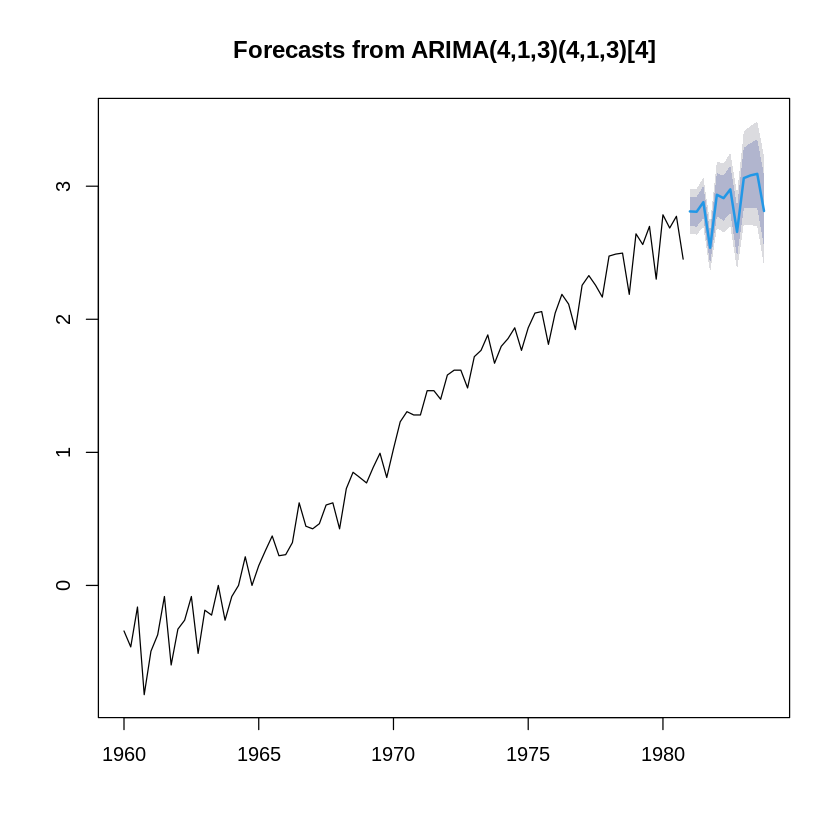


	Ljung-Box test

data:  Residuals from ARIMA(4,1,4)(4,1,4)[4]
Q* = 5.3707, df = 3, p-value = 0.1466

Model df: 16.   Total lags used: 19



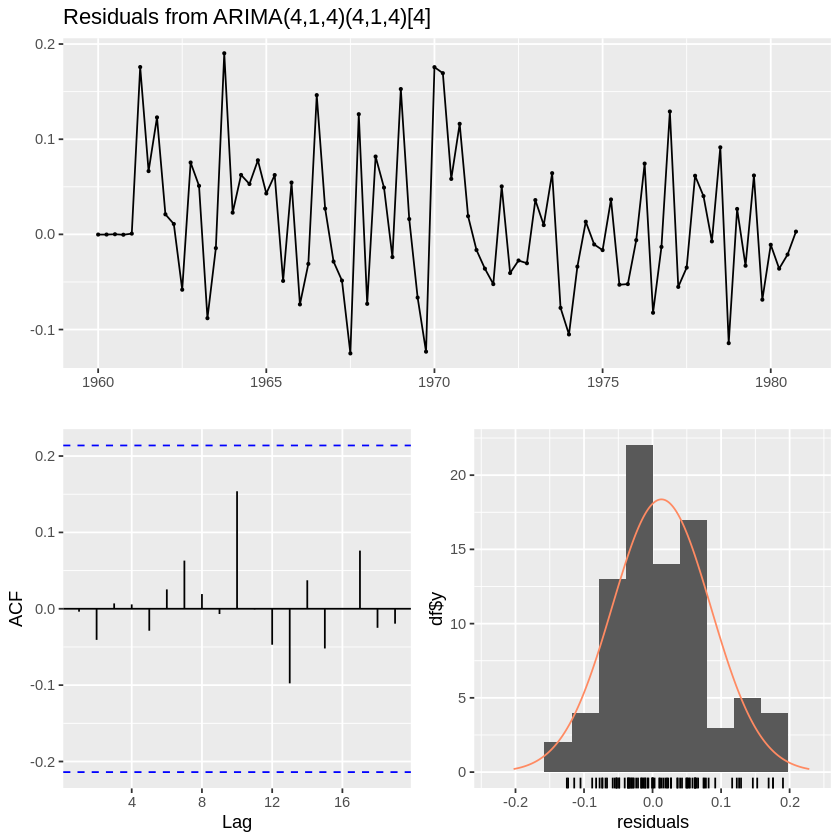

Series: log_ts_data 
ARIMA(0,0,2)(0,1,0)[4] with drift 

Coefficients:
         ma1     ma2   drift
      0.2398  0.3616  0.0384
s.e.  0.1076  0.1089  0.0039

sigma^2 = 0.00787:  log likelihood = 81.65
AIC=-155.29   AICc=-154.76   BIC=-145.76

Training set error measures:
                      ME       RMSE        MAE MPE MAPE      MASE         ACF1
Training set 0.001493826 0.08493652 0.06402484 NaN  Inf 0.3995099 -0.002793788

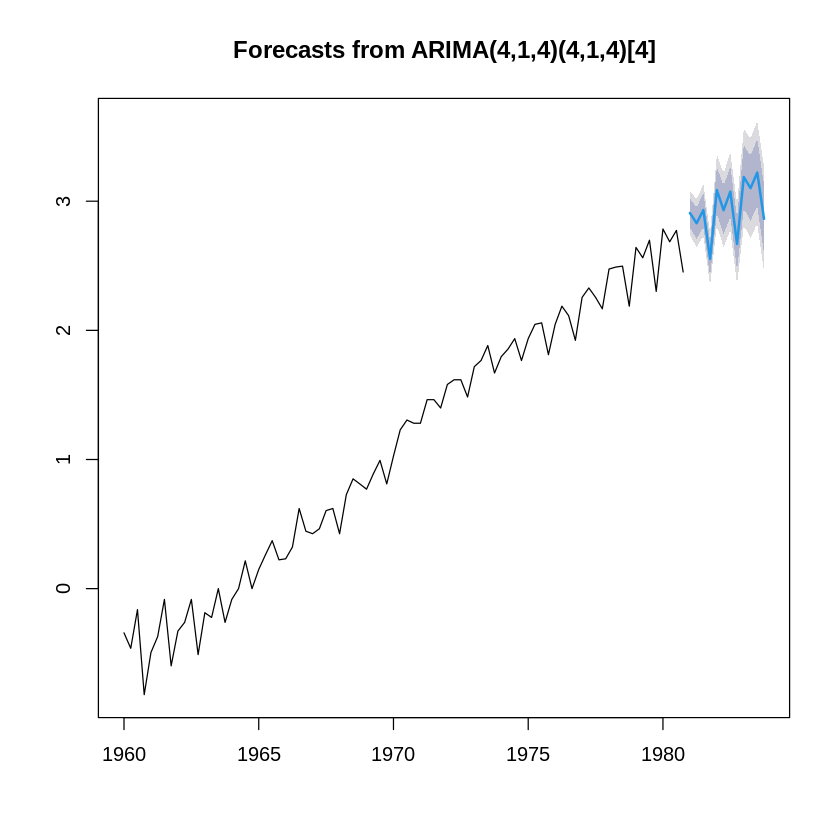


	Ljung-Box test

data:  Residuals from ARIMA(0,0,2)(0,1,0)[4] with drift
Q* = 6.9236, df = 6, p-value = 0.328

Model df: 2.   Total lags used: 8



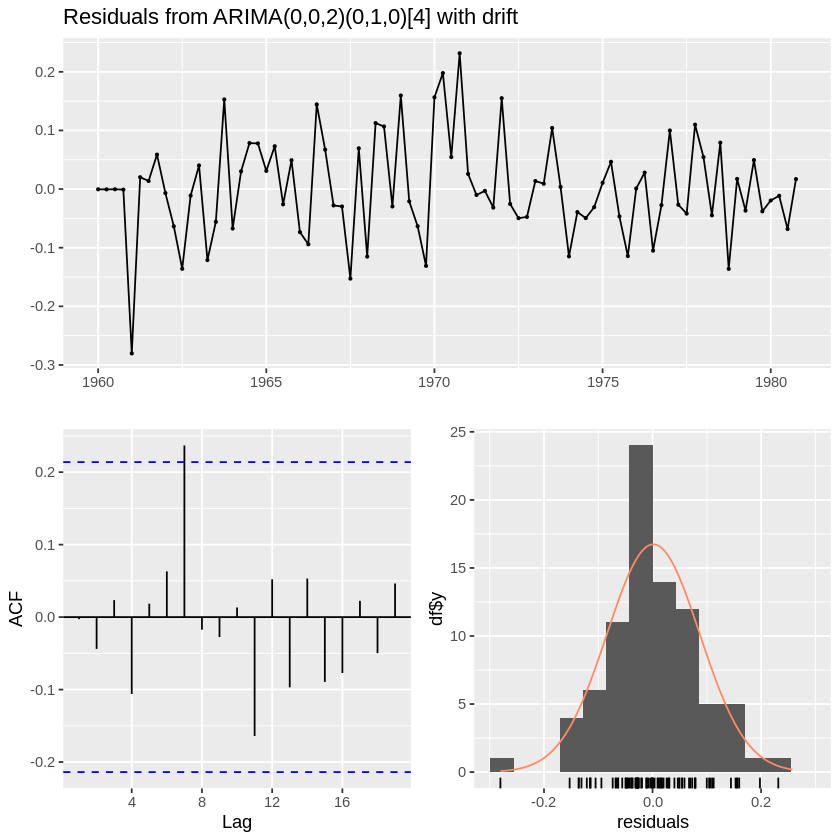

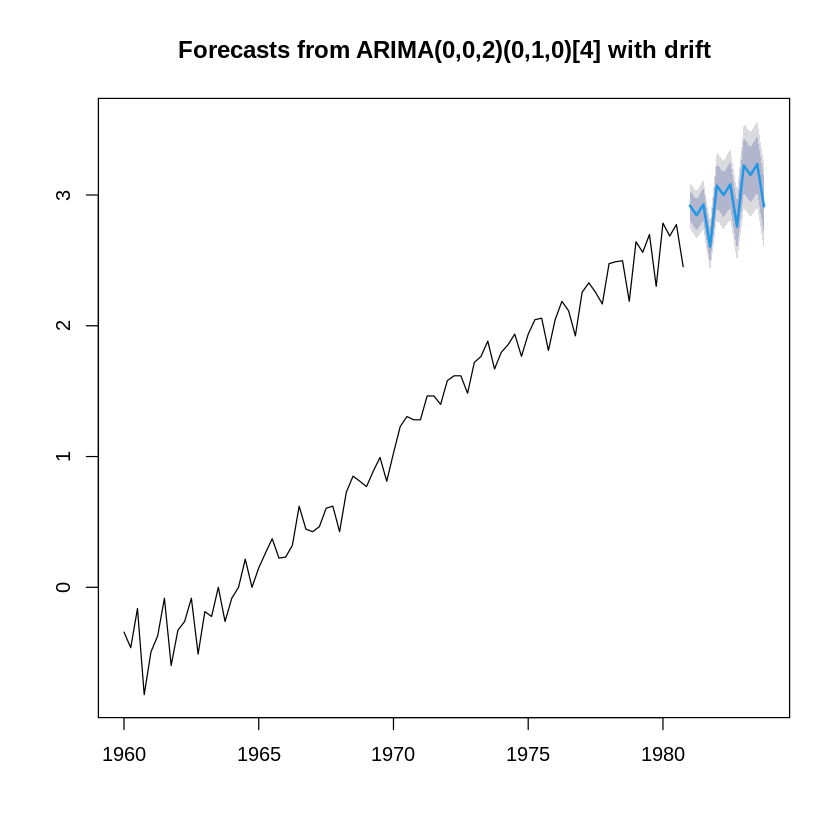

In [18]:
# Model 1
sarima_model <- Arima(log_ts_data, order = c(4,1,3), seasonal = c(4,1,3))
summary(sarima_model)
checkresiduals(sarima_model)
forecast <- forecast(sarima_model, h=12)
plot(forecast)

# Model 2
sarima_model_2 <- Arima(log_ts_data, order = c(4,1,4), seasonal = c(4,1,4))
summary(sarima_model_2)
checkresiduals(sarima_model_2)
forecast <- forecast(sarima_model_2, h=12)
plot(forecast)

# Model 3
Auto_Sarima_model <- auto.arima(log_ts_data, seasonal = TRUE, stepwise = FALSE, approximation = FALSE)
summary(Auto_Sarima_model)
checkresiduals(Auto_Sarima_model)
forecast <- forecast(Auto_Sarima_model, h=12)
plot(forecast)


Lets try to predict the values using the above ARIMA model . Try train and test for the above arima model.Divide ts-data into train and test and then look at the actual vs predicted data

Series: log_ts_data 
ARIMA(4,1,3)(4,1,3)[4] 

Coefficients:
         ar1     ar2      ar3      ar4      ma1      ma2     ma3    sar1
      0.0900  0.2559  -0.3631  -0.4866  -0.7984  -0.0762  0.2392  0.2730
s.e.  0.3143  0.2459   0.2101   0.2525   0.3440   0.4007  0.3249  0.3294
         sar2     sar3     sar4     sma1     sma2    sma3
      -0.1052  -0.6719  -0.2063  -0.1688  -0.1675  0.9973
s.e.   0.2125   0.1352   0.2629   0.2260   0.2179  0.1733

sigma^2 = 0.006412:  log likelihood = 86.76
AIC=-143.53   AICc=-135.91   BIC=-107.99
[1] "RMSE: 0.0924624295107121"


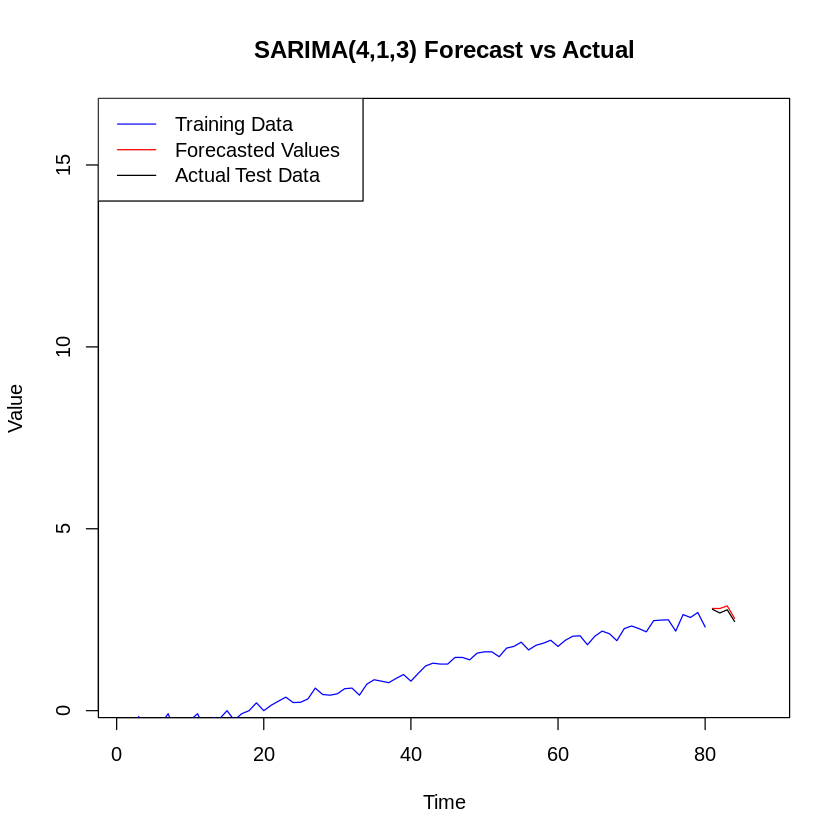

In [19]:


# Splitting the data into training and testing sets
train_data = log_ts_data[1:80]
test_data = log_ts_data[81:84]

# Fit the ARIMA model on the training data
sarima_model <- Arima(log_ts_data, order = c(4,1,3), seasonal = c(4,1,3))
print(sarima_model)

# Forecast future values using the trained ARIMA model
forecast_values <- forecast(sarima_model, h = length(test_data))

# Plot the entire time series
plot(ts_data, xlim = c(1, length(ts_data) + length(test_data)), ylim = c(min(ts_data), max(ts_data)), main="SARIMA(4,1,3) Forecast vs Actual", xlab="Time", ylab="Value")
# Overlay the training data
lines(1:80, train_data, col = "blue")

# Overlay the forecasted values
lines(81:(80+length(test_data)), forecast_values$mean, col = "red")

# Overlay the actual test data for comparison
lines(81:(80+length(test_data)), test_data, col = "black")

# Adding a legend to distinguish between the series
legend("topleft", legend = c("Training Data", "Forecasted Values", "Actual Test Data"), col = c("blue", "red", "black"), lty = 1)

# Calculate and print RMSE
rmse_value <- rmse(test_data, forecast_values$mean)
print(paste("RMSE:", rmse_value))



Series: log_ts_data 
ARIMA(4,1,4)(4,1,4)[4] 

Coefficients:
          ar1      ar2      ar3      ar4      ma1     ma2      ma3      ma4
      -0.1141  -0.0382  -0.2324  -0.5231  -0.5004  0.0247  -0.0055  -0.5141
s.e.   0.1733   0.1518   0.1436   0.1955   0.1879  0.1708   0.1560   0.2264
         sar1     sar2    sar3    sar4    sma1    sma2    sma3     sma4
      -1.1091  -0.7362  0.1581  0.4469  1.8533  1.7736  0.8376  -0.0816
s.e.   0.3073   0.4419  0.4114  0.2394  0.3392  0.6713  0.5890   0.3012

sigma^2 = 0.007038:  log likelihood = 85.66
AIC=-137.32   AICc=-127.29   BIC=-97.04
[1] "RMSE: 0.133324125797337"


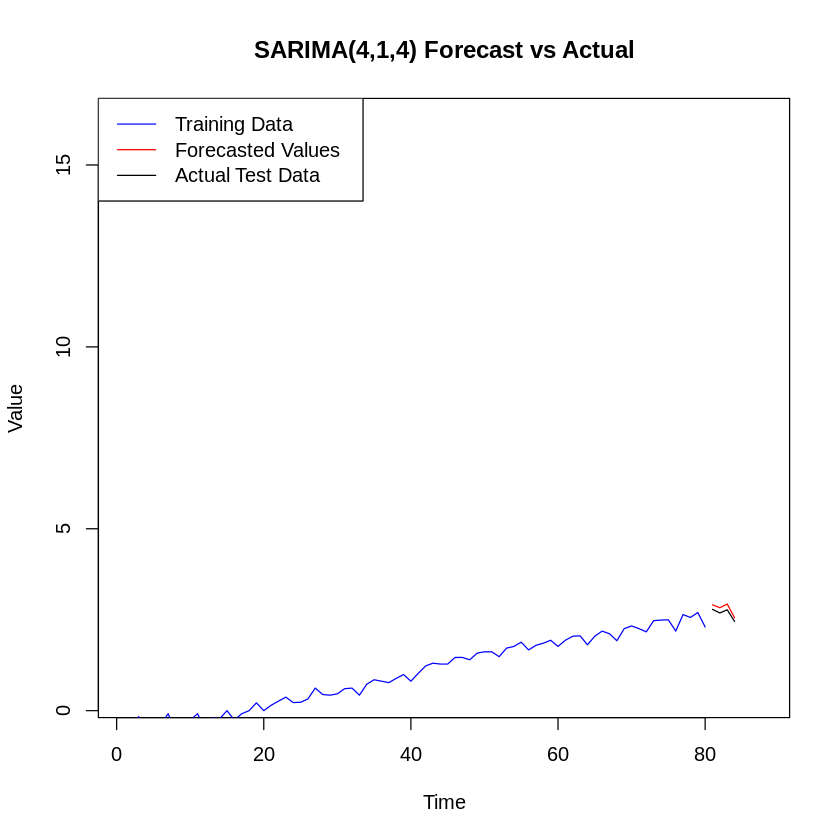

In [20]:


# Splitting the data into training and testing sets
train_data = log_ts_data[1:80]
test_data = log_ts_data[81:84]

# Fit the ARIMA model on the training data
sarima_model_2 <- Arima(log_ts_data, order = c(4,1,4), seasonal = c(4,1,4))
print(sarima_model_2)

# Forecast future values using the trained ARIMA model
forecast_values <- forecast(sarima_model_2, h = length(test_data))

# Plot the entire time series
plot(ts_data, xlim = c(1, length(ts_data) + length(test_data)), ylim = c(min(ts_data), max(ts_data)), main="SARIMA(4,1,4) Forecast vs Actual", xlab="Time", ylab="Value")
# Overlay the training data
lines(1:80, train_data, col = "blue")

# Overlay the forecasted values
lines(81:(80+length(test_data)), forecast_values$mean, col = "red")



# Overlay the actual test data for comparison
lines(81:(80+length(test_data)), test_data, col = "black")

# Adding a legend to distinguish between the series
legend("topleft", legend = c("Training Data", "Forecasted Values", "Actual Test Data"), col = c("blue", "red", "black"), lty = 1)
# Calculate and print RMSE
rmse_value <- rmse(test_data, forecast_values$mean)
print(paste("RMSE:", rmse_value))

Since the predicted value is far from the truth , lets try to see if the ARIMA order using auto arima

Series: log_ts_data 
ARIMA(0,0,2)(0,1,0)[4] with drift 

Coefficients:
         ma1     ma2   drift
      0.2398  0.3616  0.0384
s.e.  0.1076  0.1089  0.0039

sigma^2 = 0.00787:  log likelihood = 81.65
AIC=-155.29   AICc=-154.76   BIC=-145.76
[1] "RMSE: 0.150475848283352"


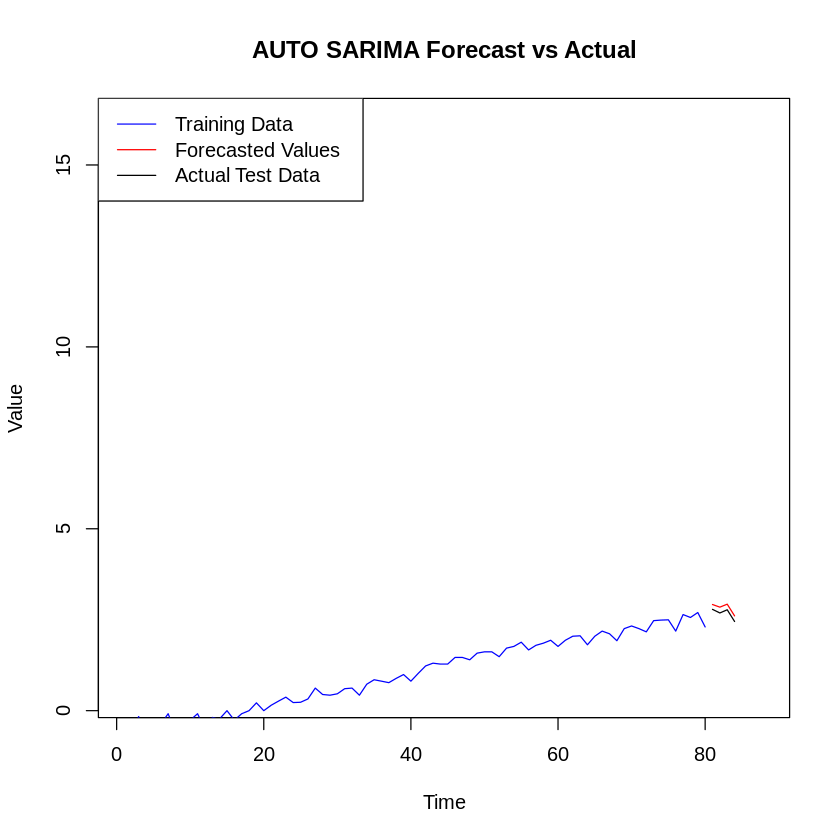

In [21]:

Auto_Sarima_model <- auto.arima(log_ts_data, seasonal = TRUE, stepwise = FALSE, approximation = FALSE)
print(Auto_Sarima_model)

# Forecast future values using the trained ARIMA model
forecast_values <- forecast(Auto_Sarima_model, h = length(test_data))

# Plot the entire time series
plot(ts_data, xlim = c(1, length(ts_data) + length(test_data)), ylim = c(min(ts_data), max(ts_data)), main="AUTO SARIMA Forecast vs Actual", xlab="Time", ylab="Value")
# Overlay the training data
lines(1:80, train_data, col = "blue")

# Overlay the forecasted values
lines(81:(80+length(test_data)), forecast_values$mean, col = "red")



# Overlay the actual test data for comparison
lines(81:(80+length(test_data)), test_data, col = "black")

# Adding a legend to distinguish between the series
legend("topleft", legend = c("Training Data", "Forecasted Values", "Actual Test Data"), col = c("blue", "red", "black"), lty = 1)

# Calculate and print RMSE
rmse_value <- rmse(test_data, forecast_values$mean)
print(paste("RMSE:", rmse_value))

[Shinu] Compared to AUTO SARIMA, CUSTOM SARIMA has lesser RMSE

In [22]:


# Forecasting the next 4 quarters
future_forecast_sarima <- forecast(sarima_model, h=12) #4,1,3


# Extracting forecast components
point_forecasts <- future_forecast_sarima$mean
lower_bounds <- future_forecast_sarima$lower
upper_bounds <- future_forecast_sarima$upper
times <- time(future_forecast_sarima$mean)


point_forecasts <- exp(point_forecasts)
lower_bounds <- exp(lower_bounds)
upper_bounds <- exp(upper_bounds)


times <- as.numeric(format(times))

# Creating a data frame with forecasted values and confidence intervals
forecast_df <- data.frame(
  Time = times,
  Point_Forecast = point_forecasts,
  Lower_80 = lower_bounds[, "80%"],
  Upper_80 = upper_bounds[, "80%"],
  Lower_95 = lower_bounds[, "95%"],
  Upper_95 = upper_bounds[, "95%"]
)

forecast_df

library(knitr)

# Assuming 'forecast_df' is your dataframe
kable(forecast_df, caption = "Forecasted Values from ARIMA(4,1,3)(4,1,3)[4]")


# Printing the data frame
#print(forecast_df)



Time,Point_Forecast,Lower_80,Upper_80,Lower_95,Upper_95
<dbl>,<ts>,<ts>,<ts>,<ts>,<ts>
1981.00,16.61757,14.91124,18.51916,14.08008,19.61237
1981.25,16.57748,14.81006,18.55581,13.95206,19.69693
1981.50,17.81549,15.78401,20.10843,14.80413,21.43940
1981.75,12.64719,11.19827,14.28360,10.49971,15.23390
1982.00,18.83431,16.00564,22.16289,14.68450,24.15685
1982.25,18.36154,15.50956,21.73796,14.18376,23.76986
1982.50,19.61300,16.39413,23.46387,14.90987,25.79966
1982.75,14.24437,11.80952,17.18123,10.69389,18.97364
1983.00,21.34559,16.99037,26.81719,15.05704,30.26053




Table: Forecasted Values from ARIMA(4,1,3)(4,1,3)[4]

|    Time| Point_Forecast| Lower_80| Upper_80| Lower_95| Upper_95|
|-------:|--------------:|--------:|--------:|--------:|--------:|
| 1981.00|       16.61757| 14.91124| 18.51916| 14.08008| 19.61237|
| 1981.25|       16.57748| 14.81006| 18.55581| 13.95206| 19.69693|
| 1981.50|       17.81549| 15.78401| 20.10843| 14.80413| 21.43940|
| 1981.75|       12.64719| 11.19827| 14.28360| 10.49971| 15.23390|
| 1982.00|       18.83431| 16.00564| 22.16289| 14.68450| 24.15685|
| 1982.25|       18.36154| 15.50956| 21.73796| 14.18376| 23.76986|
| 1982.50|       19.61300| 16.39413| 23.46387| 14.90987| 25.79966|
| 1982.75|       14.24437| 11.80952| 17.18123| 10.69389| 18.97364|
| 1983.00|       21.34559| 16.99037| 26.81719| 15.05704| 30.26053|
| 1983.25|       21.78607| 17.08506| 27.78056| 15.02226| 31.59529|
| 1983.50|       22.03946| 17.02705| 28.52743| 14.85312| 32.70276|
| 1983.75|       16.67379| 12.75114| 21.80316| 11.06332| 25.12945|

In [23]:


# Forecasting the next 4 quarters
future_forecast_sarima_2 <- forecast(sarima_model_2, h=12) #4,1,4


# Extracting forecast components
point_forecasts <- future_forecast_sarima_2$mean
lower_bounds <- future_forecast_sarima_2$lower
upper_bounds <- future_forecast_sarima_2$upper
times <- time(future_forecast_sarima_2$mean)

point_forecasts <- exp(point_forecasts)
lower_bounds <- exp(lower_bounds)
upper_bounds <- exp(upper_bounds)

# Creating a data frame with forecasted values and confidence intervals
forecast_df <- data.frame(
  Time = times,
  Point_Forecast = point_forecasts,
  Lower_80 = lower_bounds[, "80%"],
  Upper_80 = upper_bounds[, "80%"],
  Lower_95 = lower_bounds[, "95%"],
  Upper_95 = upper_bounds[, "95%"]
)

# Printing the data frame
print(forecast_df)



# Assuming 'forecast_df' is your dataframe
kable(forecast_df, caption = "Forecasted Values from ARIMA(4,1,4)(4,1,4)[4]")


      Time Point_Forecast Lower_80 Upper_80 Lower_95 Upper_95
1  1981.00       18.33206 16.37789 20.51940 15.42921 21.78105
2  1981.25       16.93734 15.00426 19.11947 14.07193 20.38622
3  1981.50       18.75059 16.43872 21.38760 15.33261 22.93051
4  1981.75       12.85579 11.24000 14.70387 10.46856 15.78741
5  1982.00       21.89341 18.29181 26.20416 16.63167 28.81981
6  1982.25       18.73578 15.54838 22.57659 14.08683 24.91898
7  1982.50       21.62724 17.76901 26.32322 16.01357 29.20883
8  1982.75       14.42595 11.76474 17.68912 10.56089 19.70553
9  1983.00       24.21916 18.95700 30.94199 16.65139 35.22633
10 1983.25       22.21907 17.27981 28.57018 15.12651 32.63721
11 1983.50       25.07135 19.34238 32.49716 16.86038 37.28104
12 1983.75       17.52335 13.45226 22.82647 11.69533 26.25558




Table: Forecasted Values from ARIMA(4,1,4)(4,1,4)[4]

|    Time| Point_Forecast| Lower_80| Upper_80| Lower_95| Upper_95|
|-------:|--------------:|--------:|--------:|--------:|--------:|
| 1981.00|       18.33206| 16.37789| 20.51940| 15.42921| 21.78105|
| 1981.25|       16.93734| 15.00426| 19.11947| 14.07193| 20.38622|
| 1981.50|       18.75059| 16.43872| 21.38760| 15.33261| 22.93051|
| 1981.75|       12.85579| 11.24000| 14.70387| 10.46856| 15.78741|
| 1982.00|       21.89341| 18.29181| 26.20416| 16.63167| 28.81981|
| 1982.25|       18.73578| 15.54838| 22.57659| 14.08683| 24.91898|
| 1982.50|       21.62724| 17.76901| 26.32322| 16.01357| 29.20883|
| 1982.75|       14.42595| 11.76474| 17.68912| 10.56089| 19.70553|
| 1983.00|       24.21916| 18.95700| 30.94199| 16.65139| 35.22633|
| 1983.25|       22.21907| 17.27981| 28.57018| 15.12651| 32.63721|
| 1983.50|       25.07135| 19.34238| 32.49716| 16.86038| 37.28104|
| 1983.75|       17.52335| 13.45226| 22.82647| 11.69533| 26.25558|

In [24]:
#prediction using Auto SARIMA

# Forecasting the next 12 quarters
future_forecast_auto <- forecast(Auto_Sarima_model, h=12)
# Extracting forecast components
point_forecasts <- future_forecast_auto$mean
lower_bounds <- future_forecast_auto$lower
upper_bounds <- future_forecast_auto$upper
times <- time(future_forecast_auto$mean)

point_forecasts <- exp(point_forecasts)
lower_bounds <- exp(lower_bounds)
upper_bounds <- exp(upper_bounds)

# Creating a data frame with forecasted values and confidence intervals
forecast_df <- data.frame(
  Time = times,
  Point_Forecast = point_forecasts,
  Lower_80 = lower_bounds[, "80%"],
  Upper_80 = upper_bounds[, "80%"],
  Lower_95 = lower_bounds[, "95%"],
  Upper_95 = upper_bounds[, "95%"]
)

# Printing the data frame
print(forecast_df)

library(knitr)

# Assuming 'forecast_df' is your dataframe
kable(forecast_df, caption = "Forecasted Values from ARIMA(0,0,2)(0,1,0)[4]")


      Time Point_Forecast Lower_80 Upper_80 Lower_95 Upper_95
1  1981.00       18.50781 16.51885 20.73625 15.55400 22.02257
2  1981.25       17.21349 15.31420 19.34832 14.39514 20.58362
3  1981.50       18.68227 16.50472 21.14712 15.45669 22.58098
4  1981.75       13.53940 11.96128 15.32573 11.20176 16.36487
5  1982.00       21.58352 18.24246 25.53649 16.68856 27.91423
6  1982.25       20.07410 16.92950 23.80280 15.46945 26.04936
7  1982.50       21.78697 18.28444 25.96045 16.66436 28.48427
8  1982.75       15.78943 13.25108 18.81403 12.07698 20.64310
9  1983.00       25.17036 20.42500 31.01821 18.28664 34.64535
10 1983.25       23.41010 18.96299 28.90012 16.96179 32.30984
11 1983.50       25.40762 20.49945 31.49096 18.29758 35.28048
12 1983.75       18.41339 14.85634 22.82210 13.26060 25.56844




Table: Forecasted Values from ARIMA(0,0,2)(0,1,0)[4]

|    Time| Point_Forecast| Lower_80| Upper_80| Lower_95| Upper_95|
|-------:|--------------:|--------:|--------:|--------:|--------:|
| 1981.00|       18.50781| 16.51885| 20.73625| 15.55400| 22.02257|
| 1981.25|       17.21349| 15.31420| 19.34832| 14.39514| 20.58362|
| 1981.50|       18.68227| 16.50472| 21.14712| 15.45669| 22.58098|
| 1981.75|       13.53940| 11.96128| 15.32573| 11.20176| 16.36487|
| 1982.00|       21.58352| 18.24246| 25.53649| 16.68856| 27.91423|
| 1982.25|       20.07410| 16.92950| 23.80280| 15.46945| 26.04936|
| 1982.50|       21.78697| 18.28444| 25.96045| 16.66436| 28.48427|
| 1982.75|       15.78943| 13.25108| 18.81403| 12.07698| 20.64310|
| 1983.00|       25.17036| 20.42500| 31.01821| 18.28664| 34.64535|
| 1983.25|       23.41010| 18.96299| 28.90012| 16.96179| 32.30984|
| 1983.50|       25.40762| 20.49945| 31.49096| 18.29758| 35.28048|
| 1983.75|       18.41339| 14.85634| 22.82210| 13.26060| 25.56844|

In [25]:


# Assuming log_ts_data is your time series data
# Define the maximum values for P, Q, D and their seasonal counterparts
max_p <- 5
max_q <- 5
max_d <- 2  # D = 0, 1
max_P <- 5
max_Q <- 5
max_D <- 2
seasonal_period <- 4  # For example, 4 for quarterly data

# Initialize matrices to store AIC and BIC values
aic_values <- array(NA, dim = c(max_p+1, max_q+1, max_d+1, max_P+1, max_Q+1, max_D+1))
bic_values <- array(NA, dim = c(max_p+1, max_q+1, max_d+1, max_P+1, max_Q+1, max_D+1))
names(dim(aic_values)) <- c("p", "q", "d", "P", "Q", "D")
names(dim(bic_values)) <- c("p", "q", "d", "P", "Q", "D")

# Iterate over possible combinations of p, d, q and P, D, Q
for (p in 0:max_p) {
  for (d in 0:max_d) {
    for (q in 0:max_q) {
      for (P in 0:max_P) {
        for (D in 0:max_D) {
          for (Q in 0:max_Q) {
            # Fit SARIMA model inside a tryCatch to handle errors
            model_fit <- tryCatch({
              Arima(log_ts_data, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = seasonal_period))
            }, error = function(e) return(NULL))

            # If model was successfully fitted, compute AIC and BIC
            if (!is.null(model_fit)) {
              aic_values[p+1, q+1, d+1, P+1, Q+1, D+1] <- AIC(model_fit)
              bic_values[p+1, q+1, d+1, P+1, Q+1, D+1] <- BIC(model_fit)
            }
          }
        }
      }
    }
  }
}

# To find the best (lowest) AIC and BIC values and their corresponding orders
min_aic <- which(aic_values == min(aic_values, na.rm = TRUE), arr.ind = TRUE)
min_bic <- which(bic_values == min(bic_values, na.rm = TRUE), arr.ind = TRUE)

cat("Best AIC values:\n")
print(min_aic)

cat("\nBest BIC values:\n")
print(min_bic)


In [26]:

lag_value =10


# Calculate RMSE for each model
rmse1 <- sqrt(mean((future_forecast_auto$mean - test_data)^2))
rmse2 <- sqrt(mean((future_forecast_sarima$mean - test_data)^2))
rmse3 <- sqrt(mean((future_forecast_sarima_2$mean - test_data)^2))


# Calculate MAE for each model's forecast
mae1 <- mean(abs(future_forecast_auto$mean - test_data))
mae2 <- mean(abs(future_forecast_sarima$mean - test_data))
mae3 <- mean(abs(future_forecast_sarima_2$mean - test_data))


# Calculate MASE for each model's forecast
mase1 <- mae1 / mean(abs(diff(log_ts_data)))
mase2 <- mae2 / mean(abs(diff(log_ts_data)))
mase3 <- mae3 / mean(abs(diff(log_ts_data)))




# Ljung-Box test for each model
ljung_box1 <- Box.test(Auto_Sarima_model$residuals, lag = lag_value, type = "Ljung-Box")$p.value
ljung_box2 <- Box.test(sarima_model$residuals, lag = lag_value, type = "Ljung-Box")$p.value
ljung_box3 <- Box.test(sarima_model_2$residuals, lag = lag_value, type = "Ljung-Box")$p.value

# Print AIC, RMSE, and Ljung-Box statistic for each model
cat("Model AUTO SARIMA (0,0,2)(0,1,0)[4] [4\n")
cat("AIC:", AIC(Auto_Sarima_model), "\n")
cat("RMSE (ARIMA 310) :", rmse1, "\n")
cat("Ljung-Box p-value:", ljung_box1, "\n\n")

cat("Model SARIMA (4,1,3)(4,1,3)[4] 220:\n")
cat("AIC:", AIC(sarima_model), "\n")
cat("RMSE (ARIMA 220):", rmse2, "\n")
cat("Ljung-Box p-value:", ljung_box2, "\n\n")

cat("Model SARIMA (4,1,4)(4,1,4)[4] :\n")
cat("AIC:", AIC(sarima_model_2), "\n")
cat("RMSE (ARIMA 525):", rmse3, "\n")
cat("Ljung-Box p-value:", ljung_box3, "\n\n")



# Create a data frame with results
results1 <- data.frame(
  Model = c("AUTO SARIMA (0,0,2)(0,1,0)[4]", "SARIMA (4,1,3)(4,1,3)[4]", "SARIMA (4,1,4)(4,1,4)[4]"),
  AIC = c(AIC(Auto_Sarima_model), AIC(sarima_model), AIC(sarima_model_2)),
  BIC = c(BIC(Auto_Sarima_model), BIC(sarima_model), BIC(sarima_model_2)),
  RMSE = c(rmse1, rmse2, rmse3)
)


# Create a data frame with results
results2 <- data.frame(
  Model = c("AUTO SARIMA (0,0,2)(0,1,0)[4]", "SARIMA (4,1,3)(4,1,3)[4]", "SARIMA (4,1,4)(4,1,4)[4]"),

  MAE = c(mae1, mae2, mae3),
  MASE = c(mase1, mase2, mase3),
  Ljung_Box_p_value = c(ljung_box1, ljung_box2, ljung_box3)
)

# Remove the data type column
results1 <- results1[, -c(8)]

# Format the data frame for better display
results1 <- format(results1, scientific = FALSE)



# Assuming 'forecast_df' is your dataframe
kable(results1, caption = "Model Comparison")


# Remove the data type column
results2 <- results2[, -c(8)]

# Format the data frame for better display
results2 <- format(results2, scientific = FALSE)


# Assuming 'forecast_df' is your dataframe
kable(results2, caption = "Model Comparison")

Model AUTO SARIMA (0,0,2)(0,1,0)[4] [4
AIC: -155.2913 
RMSE (ARIMA 310) : 0.3289344 
Ljung-Box p-value: 0.7241467 

Model SARIMA (4,1,3)(4,1,3)[4] 220:
AIC: -143.5284 
RMSE (ARIMA 220): 0.2336848 
Ljung-Box p-value: 0.9967675 

Model SARIMA (4,1,4)(4,1,4)[4] :
AIC: -137.323 
RMSE (ARIMA 525): 0.297631 
Ljung-Box p-value: 0.98107 





Table: Model Comparison

|Model                         |AIC       |BIC        |RMSE      |
|:-----------------------------|:---------|:----------|:---------|
|AUTO SARIMA (0,0,2)(0,1,0)[4] |-155.2913 |-145.76317 |0.3289344 |
|SARIMA (4,1,3)(4,1,3)[4]      |-143.5284 |-107.98667 |0.2336848 |
|SARIMA (4,1,4)(4,1,4)[4]      |-137.3230 |-97.04235  |0.2976310 |



Table: Model Comparison

|Model                         |MAE       |MASE     |Ljung_Box_p_value |
|:-----------------------------|:---------|:--------|:-----------------|
|AUTO SARIMA (0,0,2)(0,1,0)[4] |0.3038732 |1.823166 |0.7241467         |
|SARIMA (4,1,3)(4,1,3)[4]      |0.2061440 |1.236814 |0.9967675         |
|SARIMA (4,1,4)(4,1,4)[4]      |0.2722157 |1.633228 |0.9810700         |